# Exercise - Black's Formula for Options on Futures

#### Notation Commands

$$\newcommand{\Black}{\mathcal{B}}
\newcommand{\Blackcall}{\Black_{\mathrm{call}}}
\newcommand{\Blackput}{\Black_{\mathrm{put}}}
\newcommand{\EcondS}{\hat{S}_{\mathrm{conditional}}}
\newcommand{\Efwd}{\mathbb{E}^{T}}
\newcommand{\Ern}{\mathbb{E}^{\mathbb{Q}}}
\newcommand{\Tfwd}{T_{\mathrm{fwd}}}
\newcommand{\Tunder}{T_{\mathrm{bond}}}
\newcommand{\accint}{A}
\newcommand{\carry}{\widetilde{\cpn}}
\newcommand{\cashflow}{C}
\newcommand{\convert}{\phi}
\newcommand{\cpn}{c}
\newcommand{\ctd}{\mathrm{CTD}}
\newcommand{\disc}{Z}
\newcommand{\done}{d_{1}}
\newcommand{\dt}{\Delta t}
\newcommand{\dtwo}{d_{2}}
\newcommand{\flatvol}{\sigma_{\mathrm{flat}}}
\newcommand{\flatvolT}{\sigma_{\mathrm{flat},T}}
\newcommand{\float}{\mathrm{flt}}
\newcommand{\freq}{m}
\newcommand{\futprice}{\mathcal{F}(t,T)}
\newcommand{\futpriceDT}{\mathcal{F}(t+h,T)}
\newcommand{\futpriceT}{\mathcal{F}(T,T)}
\newcommand{\futrate}{\mathscr{f}}
\newcommand{\fwdprice}{F(t,T)}
\newcommand{\fwdpriceDT}{F(t+h,T)}
\newcommand{\fwdpriceT}{F(T,T)}
\newcommand{\fwdrate}{f}
\newcommand{\fwdvol}{\sigma_{\mathrm{fwd}}}
\newcommand{\fwdvolTi}{\sigma_{\mathrm{fwd},T_i}}
\newcommand{\grossbasis}{B}
\newcommand{\hedge}{\Delta}
\newcommand{\ivol}{\sigma_{\mathrm{imp}}}
\newcommand{\logprice}{p}
\newcommand{\logyield}{y}
\newcommand{\mat}{(n)}
\newcommand{\nargcond}{d_{1}}
\newcommand{\nargexer}{d_{2}}
\newcommand{\netbasis}{\tilde{\grossbasis}}
\newcommand{\normcdf}{\mathcal{N}}
\newcommand{\notional}{K}
\newcommand{\pfwd}{P_{\mathrm{fwd}}}
\newcommand{\pnl}{\Pi}
\newcommand{\price}{P}
\newcommand{\probexer}{\hat{\mathcal{P}}_{\mathrm{exercise}}}
\newcommand{\pvstrike}{K^*}
\newcommand{\refrate}{r^{\mathrm{ref}}}
\newcommand{\rrepo}{r^{\mathrm{repo}}}
\newcommand{\spotrate}{r}
\newcommand{\spread}{s}
\newcommand{\strike}{K}
\newcommand{\swap}{\mathrm{sw}}
\newcommand{\swaprate}{\cpn_{\swap}}
\newcommand{\tbond}{\mathrm{fix}}
\newcommand{\ttm}{\tau}
\newcommand{\value}{V}
\newcommand{\vega}{\nu}
\newcommand{\years}{\tau}
\newcommand{\yearsACT}{\tau_{\mathrm{act/360}}}
\newcommand{\yield}{Y}$$

### Data

In this exercise, we use Black's formula to price options on futures contracts.
* `option_data_bb_SFRZ5.xlsx` - market data on SOFR 3-month futures, and its option chain.

# 1. SOFR Futures Options

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log, sqrt, exp
from scipy.stats import norm

In [ ]:
FILEDATA = "option_data_bb_SFRZ5.xlsx"
SHEETNAME = 'spot'
spot = pd.read_excel(FILEDATA, sheet_name=SHEETNAME).rename(columns={'Unnamed: 0': 'field'}).set_index('field')
display(spot)

,SFRZ5 Comdty
field,
name,3 MONTH SOFR FUT Dec25
last update date,2025-07-29 00:00:00
last update time,10:03:48
price,96.085
hist vol 30d,0.006851
hist vol 60d,0.007595
volume,150071


Index(['SFRZ5 Comdty'], dtype='object')

In [12]:
EXPRY_CHAIN_LOC = 1
SHEETNAME = pd.ExcelFile(FILEDATA).sheet_names[EXPRY_CHAIN_LOC]
options = pd.read_excel(FILEDATA, sheet_name=SHEETNAME).set_index('ticker')
display(options.loc[options['option type'].str.contains('C')])
display(options.loc[options['option type'].str.contains('P')])
options.columns

,last update date,last update time,days to expiration,option type,exercise style,option contract size,strike price,price,finance rate,time value,...,delta,gamma,vega,theta,bid,ask,bid size,ask size,open int,volume
ticker,,,,,,,,,,,,,,,,,,,,,
SFRV5C 95.75 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.7500,0.3300,0.04396,-0.0050,...,0.899011,0.028984,0.002962,-0.000265,0.3350,0.350,51,51,10703,NaN
SFRV5C 95.8125 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.8125,0.2775,0.04396,0.0050,...,0.847946,0.037543,0.003990,-0.000369,0.2850,0.295,120,333,0,NaN
SFRV5C 95.875 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.8750,0.2325,0.04396,0.0225,...,0.768768,0.045176,0.005212,-0.000524,0.2350,0.245,14976,119,20020,NaN
SFRV5C 95.9375 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.9375,0.1950,0.04396,0.0475,...,0.679044,0.049114,0.006161,-0.000676,0.1950,0.205,15838,248,7013,NaN
SFRV5C 96 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.0000,0.1600,0.04396,0.0750,...,0.589523,0.049138,0.006712,-0.000805,0.1600,0.175,7500,19302,15635,NaN
SFRV5C 96.0625 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.0625,0.1300,0.04396,0.1075,...,0.506743,0.047811,0.006902,-0.000892,0.1350,0.145,100,36274,31106,3882.0
SFRV5C 96.125 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.1250,0.1050,0.04396,0.1050,...,0.430860,0.046676,0.006811,-0.000887,0.1050,0.115,37066,8327,43461,2500.0
SFRV5C 96.1875 Comdty,2025-07-29,08:33:45,73,C,AMER,2500,96.1875,0.0850,0.04396,0.0850,...,0.360056,0.043005,0.006494,-0.000875,0.0800,0.095,56885,48479,76938,2698.0
SFRV5C 96.25 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.2500,0.0675,0.04396,0.0675,...,0.297882,0.038291,0.006022,-0.000844,0.0650,0.075,46199,27485,72563,9950.0


,last update date,last update time,days to expiration,option type,exercise style,option contract size,strike price,price,finance rate,time value,...,delta,gamma,vega,theta,bid,ask,bid size,ask size,open int,volume
ticker,,,,,,,,,,,,,,,,,,,,,
SFRV5P 95.75 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.7500,0.0075,0.04396,0.0075,...,-0.076812,0.025414,0.002511,-0.000220,0.0050,0.010,25297,11208,57342,2550.0
SFRV5P 95.8125 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.8125,0.0175,0.04396,0.0175,...,-0.138375,0.036404,0.003844,-0.000361,0.0125,0.020,50328,39390,18597,NaN
SFRV5P 95.875 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.8750,0.0350,0.04396,0.0350,...,-0.219462,0.045113,0.005143,-0.000522,0.0275,0.035,40887,8311,50736,5225.0
SFRV5P 95.9375 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.9375,0.0575,0.04396,0.0575,...,-0.313520,0.049041,0.006158,-0.000689,0.0500,0.060,33397,49762,18828,NaN
SFRV5P 96 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.0000,0.0850,0.04396,0.0850,...,-0.398240,0.051125,0.006694,-0.000782,0.0750,0.085,53974,758,62162,1000.0
SFRV5P 96.0625 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.0625,0.1175,0.04396,0.1175,...,-0.483743,0.048766,0.006901,-0.000871,0.1100,0.120,1197,40350,11505,3286.0
SFRV5P 96.125 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.1250,0.1550,0.04396,0.1150,...,-0.560378,0.046505,0.006812,-0.000895,0.1450,0.155,867,34387,63551,NaN
SFRV5P 96.1875 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.1875,0.1950,0.04396,0.0925,...,-0.634074,0.043781,0.006484,-0.000842,0.1850,0.195,353,22485,14955,NaN
SFRV5P 96.25 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.2500,0.2425,0.04396,0.0775,...,-0.698355,0.038957,0.005992,-0.000807,0.2300,0.240,238,17500,13145,NaN


Index(['last update date', 'last update time', 'days to expiration',
       'option type', 'exercise style', 'option contract size', 'strike price',
       'price', 'finance rate', 'time value', 'implied vol', 'delta', 'gamma',
       'vega', 'theta', 'bid', 'ask', 'bid size', 'ask size', 'open int',
       'volume'],
      dtype='object')

### 1.1.

Use Black's Formula to price the **call option**
* at the nearest expiration
* using the ATM strike (strike nearest the spot)
* using the implied vol provided in the data
* using the finance rate as the discount rate

How close is your estimate to the market quote?

In [23]:
#Futures Price
F0 = float(spot.loc['price'].squeeze())

#ATM at Nearest Expiry
calls = options.loc[options['option type'] ==  'C'].copy()
calls['abs_diff'] = (calls['strike price'] - F0).abs()
atm_call = calls.sort_values('abs_diff').iloc[0]
display(atm_call[['strike price', 'price', 'bid', 'ask', 'implied vol', 'finance rate', 'days to expiration']])

K = float(atm_call['strike price'])
implied_vol_rate = float(atm_call['implied vol']) #already annualized
R = (100 - F0) / 100.0 #convert to decimal
sigma = implied_vol_rate * R
#Finance Rate
r = float(atm_call['finance rate'])
#Time to Maturity (years)
T = float(atm_call['days to expiration']) / 365.0

#Black's Formula
d1 = (log(F0/K) + 0.5 * sigma**2 * T) / (sigma * sqrt(T))
d2 = d1 - sigma * sqrt(T)
black_price = exp(-r * T) * (F0 * norm.cdf(d1) - K * norm.cdf(d2))

#Market Price
market_price = float(atm_call['price'])

print(f"Black's Formula Price: ${black_price:.3f}")
print(f'Market Price: ${market_price:.3f}')
print(f'Difference: ${market_price - black_price:.3f}')

strike price           96.0625
price                     0.13
bid                      0.135
ask                      0.145
implied vol           0.185438
finance rate           0.04396
days to expiration          73
Name: SFRV5C   96.0625 Comdty, dtype: object

Black's Formula Price: $0.135
Market Price: $0.130
Difference: $-0.005


The estimate from Black's Formula is very close to the Market Price, with a difference of **less than 1 cent.**

### 1.2.

Value the entire strike chain for the nearest expiration.
* Use the provided implied vol for each strike.

Plot the Black values against the market values.

In [24]:
chain = options.copy()
chain['T'] = chain['days to expiration'].astype(float) / 365.0
chain['r'] = chain['finance rate'].astype(float)
chain['sigma_black'] = chain['implied vol'].astype(float) * R
K = chain['strike price'].astype(float).to_numpy()
T = chain['T'].to_numpy()
r = chain['r'].to_numpy()
sigma = chain['sigma_black'].to_numpy()
d1 = (np.log(F0/K) + 0.5 * sigma**2 * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
df = np.exp(-r * T)

#Price Calls & Puts
is_call = chain['option type'].astype(str).eq('C').to_numpy()
call_price = df * (F0 * norm.cdf(d1) - K * norm.cdf(d2))
put_price = df * (K * norm.cdf(-d2) - F0 * norm.cdf(-d1))
chain['black_price'] = np.where(is_call, call_price, put_price)

#Market Comps
chain['market_last'] = chain['price'].astype(float)
chain['market_mid'] = 0.5 * (chain['bid'].astype(float) + chain['ask'].astype(float))

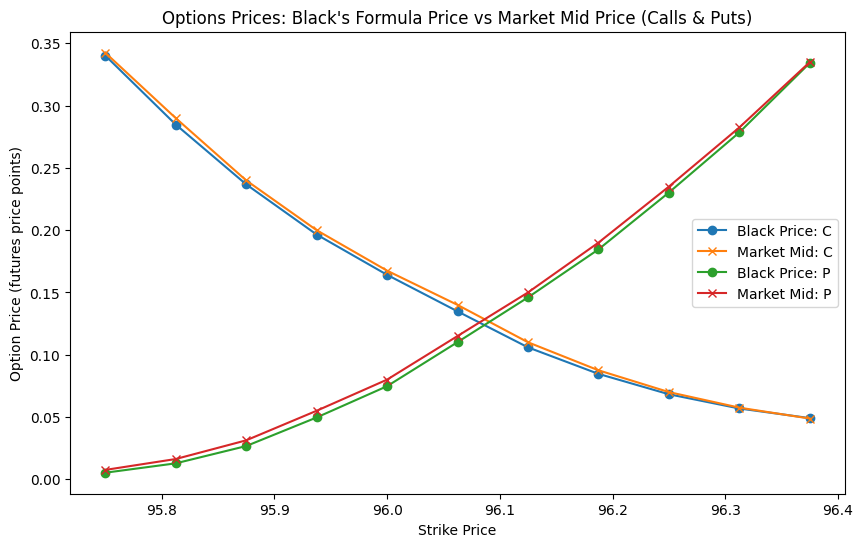

In [31]:
#Plot Black Values vs Market Values
plot_df = chain.sort_values(['option type', 'strike price'])
plt.figure(figsize=(10, 6))
for option_type, group in plot_df.groupby('option type'):
    plt.plot(group['strike price'], group['black_price'], marker='o', label=f'Black Price: {option_type}')
    plt.plot(group['strike price'], group['market_mid'], marker='x', label=f'Market Mid: {option_type}')
plt.xlabel('Strike Price')
plt.ylabel('Option Price (futures price points)')
plt.title("Options Prices: Black's Formula Price vs Market Mid Price (Calls & Puts)")
plt.legend()
plt.show()

### 1.3. 

What are a few reasons that Black's value doesn't match the market value?

How significant is the American nature of the exercise?

**Reasons Black's Values doesn't match Market**
- American vs. European Exercise: Black's Formula assumes European exercise, but the SOFR options in the data are American-style, which introduces some bias
- Implied Volatility: The implied vol in the dataset is itself extracted from a model and may not be consistent across strikes. Any smoothing/rounding/interpolation of the implied vol translates directly into small price discrepancies.
- Discount Rate: Black's Formula uses a single finance rate for discounting, but in practice, discounting & forwarding would come from a full curve. 
- Market Frictions: Black produces a frictionless theoretical price, so small deviations from the market are expected.
- Model Assumptions: lognormal futures prices, constant vol, and continuous trading are all idealizations. 

**American Nature**
- For this specific exercise, the American nature is not very significant. The underlying is a futures contract, so there is no carry or dividend effect that strongly incentivizes early exercise. Additionally, the time to maturity is short and the options are near the money, where early-exercise value is minimal. 
- Looking at the plot above, the Black prices are close to the market mids, indicating that the early-exercise premium is negligible. 

### 1.4.

How is implied vol being quoted? As in, does it reflect units of vol of percent changes in the SOFR rate? Or day-over-day differences? Or something else?

Use the data in `ref_rates.xlsx` to calculate the historic 60-day rolling volatility of the SOFR rate.

In [34]:
ref_rates = pd.read_excel('ref_rates.xlsx', sheet_name='data').set_index('date')
ref_rates.describe()

,DTB3,DFF,SOFR
count,1999.000000,2922.000000,1935.000000
mean,2.563667,2.564517,2.593907
std,1.917449,1.957794,1.990638
min,-0.050000,0.040000,0.010000
25%,0.395000,0.270000,0.100000
50%,2.320000,2.330000,2.360000
75%,4.270000,4.330000,4.405000
max,5.360000,5.330000,5.400000


Implied Vol in the option chain is volatility of the SOFR rate level, quoted as a relative (lognormal-style) volatility. It refelects a **percentage change in the SOFR rate**, not absolute bp changes. 

In [35]:
#Calculate historic 60-day rolling vol of SOFR rate
sofr = ref_rates['SOFR'].dropna()
#Log Returns of SOFR 
sofr_log_ret = np.log(sofr / sofr.shift(1))

#60-day Rolling Vol
rolling_vol_60d = sofr_log_ret.rolling(window=60).std() * np.sqrt(252)
rolling_vol_60d.describe()

count    1875.000000
mean        1.338998
std         1.900014
min         0.000000
25%         0.117953
50%         0.393593
75%         1.702769
max         8.990959
Name: SOFR, dtype: float64

The values above are comparable magnitude to the implied volatilities observed in the option data. To price options on the futures prices using Black's Formula, thi rate-level volatility must be scaled by the level of the underlying rate. 

### 1.5.

Plot the open interest across strikes. 

Report the total notional open interest across the chain for this expiration.

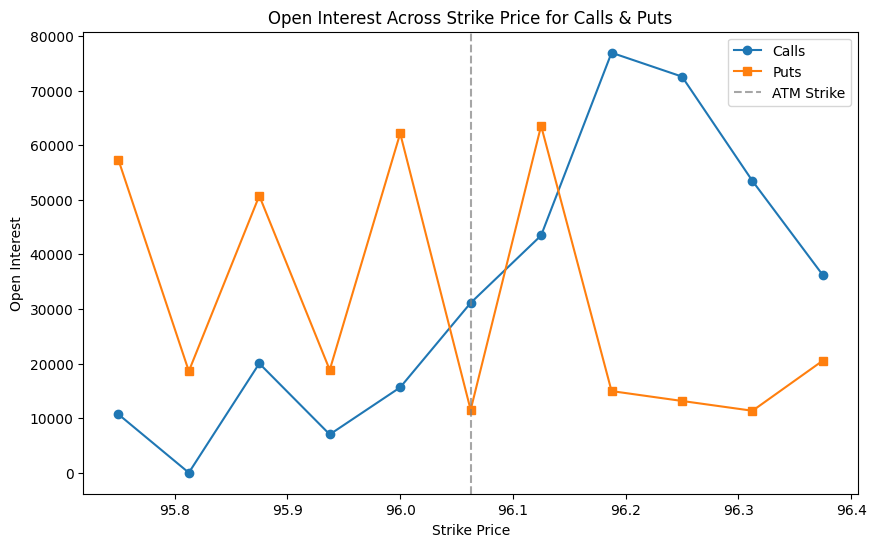

In [37]:
chain['strike price'] = chain['strike price'].astype(float)
chain['open int'] = chain['open int'].astype(float)
chain['option contract size'] = chain['option contract size'].astype(float)
atm_strike = chain.loc[
    (chain['strike price'] - F0).abs().idxmin(), 'strike price'
]

calls = chain[chain['option type'] == 'C']
puts = chain[chain['option type'] == 'P']

#Plot
plt.figure(figsize=(10, 6))
plt.plot(calls['strike price'], calls['open int'], label='Calls', marker ='o')
plt.plot(puts['strike price'], puts['open int'], label='Puts', marker ='s')
plt.axvline(x=atm_strike, color='gray', linestyle='--', alpha=0.7, label='ATM Strike')
plt.xlabel('Strike Price')
plt.ylabel('Open Interest')
plt.title('Open Interest Across Strike Price for Calls & Puts')
plt.legend()
plt.show()

In [38]:
#Total Notional
total_notional = (chain['open int'] * chain['option contract size']).sum()
print(f'Total Notional of Open Interest: ${total_notional:,.2f}')

Total Notional of Open Interest: $1,774,437,500.00
